In [1]:
paths_to_results = [ # baselines (if compare)
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.6.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.7.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.8.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.9.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp1.0.json.gz",
]
compare = []
from pathlib import Path
for p in paths_to_results + compare:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [2]:
from coderm.eval.metrics import get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np

all_pass_ks = {}
for r in (paths_to_results + compare):
    print(f"Reading", r)
    items = gunzip_json_read(r)["items"]
    upper_k = len(items[0]["results"])
    pass_ks = {}
    for k in range(1, upper_k+1):
        pass_ks[k] = np.mean(get_pass_ks(items, k))
    all_pass_ks[r] = pass_ks

Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.6.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.7.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.8.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.9.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp1.0.json.gz


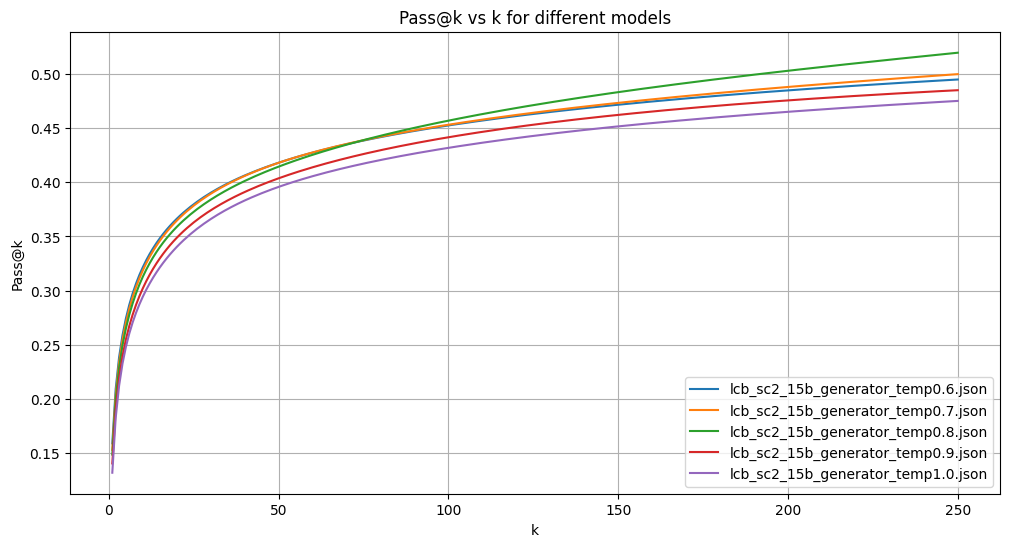

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))
for label, values in all_pass_ks.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--' if any(p in label for p in paths_to_results) and len(compare) > 0 else '-'
    plt.plot(ks, pass_at_k, label=Path(label).stem, linestyle=linestyle)

plt.xlabel('k')
plt.ylabel('Pass@k')
plt.title('Pass@k vs k for different models')
plt.legend()
plt.grid(True)
plt.show()

# ORM Pass@{1, n}

In [4]:
paths_to_results = [
    "../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_7b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_7b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz",
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [5]:
from coderm.eval.metrics import get_orm_acc
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm

all_orm_accs = {}
for r in (paths_to_results + compare):
    print(f"Reading", r)
    items = gunzip_json_read(r)["items"]
    upper_n = len(items[0]["results"])
    orm_accs = {}
    for n in tqdm(list(range(1, upper_n+1))):
        print(n)
        orm_accs[n] = np.mean(get_orm_acc(items, n=n)[0])
    all_orm_accs[r] = orm_accs

43
Using 58 permutations for ORM accuracy


 43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                    | 43/100 [00:08<00:16,  3.41it/s]

44
Using 57 permutations for ORM accuracy


 44%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 44/100 [00:09<00:16,  3.39it/s]

45
Using 56 permutations for ORM accuracy


 45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                | 45/100 [00:09<00:16,  3.34it/s]

46
Using 55 permutations for ORM accuracy


 46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 46/100 [00:09<00:16,  3.36it/s]

47
Using 54 permutations for ORM accuracy


 47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 47/100 [00:10<00:15,  3.39it/s]

48
Using 53 permutations for ORM accuracy


 48%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 48/100 [00:10<00:15,  3.39it/s]

49
Using 52 permutations for ORM accuracy


 49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 49/100 [00:10<00:15,  3.37it/s]

50
Using 51 permutations for ORM accuracy


 50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 50/100 [00:11<00:14,  3.39it/s]

51
Using 50 permutations for ORM accuracy


 51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 51/100 [00:11<00:14,  3.40it/s]

52
Using 49 permutations for ORM accuracy


 52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 52/100 [00:11<00:14,  3.42it/s]

53
Using 48 permutations for ORM accuracy


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 53/100 [00:11<00:13,  3.38it/s]

54
Using 47 permutations for ORM accuracy


 54%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 54/100 [00:12<00:13,  3.41it/s]

55
Using 45 permutations for ORM accuracy


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 55/100 [00:12<00:13,  3.44it/s]

56
Using 44 permutations for ORM accuracy


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 56/100 [00:12<00:12,  3.47it/s]

57
Using 44 permutations for ORM accuracy


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 57/100 [00:13<00:12,  3.43it/s]

58
Using 43 permutations for ORM accuracy


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 58/100 [00:13<00:12,  3.43it/s]

59
Using 42 permutations for ORM accuracy


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 59/100 [00:13<00:11,  3.46it/s]

60
Using 41 permutations for ORM accuracy


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 60/100 [00:13<00:11,  3.49it/s]

61
Using 40 permutations for ORM accuracy


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 61/100 [00:14<00:11,  3.52it/s]

62
Using 39 permutations for ORM accuracy


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 62/100 [00:14<00:10,  3.55it/s]

63
Using 38 permutations for ORM accuracy


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 63/100 [00:14<00:10,  3.51it/s]

64
Using 37 permutations for ORM accuracy


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 64/100 [00:15<00:10,  3.58it/s]

65
Using 36 permutations for ORM accuracy


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 65/100 [00:15<00:09,  3.64it/s]

66
Using 35 permutations for ORM accuracy


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 67/100 [00:15<00:08,  3.80it/s]

67
Using 33 permutations for ORM accuracy
68
Using 33 permutations for ORM accuracy


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 69/100 [00:16<00:07,  3.92it/s]

69
Using 32 permutations for ORM accuracy
70
Using 31 permutations for ORM accuracy


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 71/100 [00:16<00:07,  4.00it/s]

71
Using 30 permutations for ORM accuracy
72
Using 29 permutations for ORM accuracy


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 73/100 [00:17<00:06,  4.16it/s]

73
Using 28 permutations for ORM accuracy
74
Using 27 permutations for ORM accuracy


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 75/100 [00:17<00:05,  4.36it/s]

75
Using 26 permutations for ORM accuracy
76
Using 25 permutations for ORM accuracy


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/100 [00:18<00:05,  4.59it/s]

77
Using 24 permutations for ORM accuracy
78
Using 22 permutations for ORM accuracy


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 79/100 [00:18<00:04,  4.96it/s]

79
Using 21 permutations for ORM accuracy
80
Using 20 permutations for ORM accuracy


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 81/100 [00:18<00:03,  5.29it/s]

81
Using 19 permutations for ORM accuracy
82
Using 19 permutations for ORM accuracy


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 83/100 [00:19<00:03,  5.58it/s]

83
Using 18 permutations for ORM accuracy
84
Using 17 permutations for ORM accuracy


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 85/100 [00:19<00:02,  6.00it/s]

85
Using 16 permutations for ORM accuracy
86
Using 15 permutations for ORM accuracy


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 87/100 [00:19<00:01,  6.54it/s]

87
Using 14 permutations for ORM accuracy
88
Using 13 permutations for ORM accuracy


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 90/100 [00:20<00:01,  8.00it/s]

89
Using 11 permutations for ORM accuracy
90
Using 10 permutations for ORM accuracy
91
Using 9 permutations for ORM accuracy


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 92/100 [00:20<00:00,  9.34it/s]

92
Using 8 permutations for ORM accuracy
93
Using 7 permutations for ORM accuracy
94
Using 7 permutations for ORM accuracy


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.84it/s]

95
Using 6 permutations for ORM accuracy
96
Using 5 permutations for ORM accuracy
97
Using 4 permutations for ORM accuracy
98
Using 3 permutations for ORM accuracy
99
Using 2 permutations for ORM accuracy
100
Using 1 permutations for ORM accuracy
Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz



  2%|███▌                                                                                                                                                                             | 2/100 [00:00<00:05, 16.63it/s]

1
Using 100 permutations for ORM accuracy
2
Using 99 permutations for ORM accuracy
3
Using 98 permutations for ORM accuracy
4
Using 97 permutations for ORM accuracy


  6%|██████████▌                                                                                                                                                                      | 6/100 [00:00<00:08, 10.69it/s]

5
Using 96 permutations for ORM accuracy
6
Using 95 permutations for ORM accuracy
7
Using 94 permutations for ORM accuracy


  8%|██████████████▏                                                                                                                                                                  | 8/100 [00:00<00:10,  9.08it/s]

8
Using 93 permutations for ORM accuracy
9
Using 92 permutations for ORM accuracy


 10%|█████████████████▌                                                                                                                                                              | 10/100 [00:01<00:11,  7.81it/s]

10
Using 91 permutations for ORM accuracy
11
Using 90 permutations for ORM accuracy


 12%|█████████████████████                                                                                                                                                           | 12/100 [00:01<00:12,  6.85it/s]

12
Using 89 permutations for ORM accuracy
13
Using 88 permutations for ORM accuracy


 14%|████████████████████████▋                                                                                                                                                       | 14/100 [00:01<00:14,  6.01it/s]

14
Using 87 permutations for ORM accuracy
15
Using 86 permutations for ORM accuracy


 16%|████████████████████████████▏                                                                                                                                                   | 16/100 [00:02<00:15,  5.41it/s]

16
Using 85 permutations for ORM accuracy
17
Using 84 permutations for ORM accuracy


 18%|███████████████████████████████▋                                                                                                                                                | 18/100 [00:02<00:16,  4.98it/s]

18
Using 83 permutations for ORM accuracy
19
Using 82 permutations for ORM accuracy


 20%|███████████████████████████████████▏                                                                                                                                            | 20/100 [00:03<00:17,  4.53it/s]

20
Using 81 permutations for ORM accuracy
21
Using 80 permutations for ORM accuracy


 22%|██████████████████████████████████████▋                                                                                                                                         | 22/100 [00:03<00:18,  4.22it/s]

22
Using 79 permutations for ORM accuracy
23
Using 78 permutations for ORM accuracy


 23%|████████████████████████████████████████▍                                                                                                                                       | 23/100 [00:03<00:18,  4.10it/s]

24
Using 77 permutations for ORM accuracy


 24%|██████████████████████████████████████████▏                                                                                                                                     | 24/100 [00:04<00:18,  4.05it/s]

25
Using 76 permutations for ORM accuracy


 25%|████████████████████████████████████████████                                                                                                                                    | 25/100 [00:04<00:18,  3.98it/s]

26
Using 75 permutations for ORM accuracy


 26%|█████████████████████████████████████████████▊                                                                                                                                  | 26/100 [00:04<00:18,  3.91it/s]

27
Using 74 permutations for ORM accuracy


 27%|███████████████████████████████████████████████▌                                                                                                                                | 27/100 [00:04<00:19,  3.81it/s]

28
Using 73 permutations for ORM accuracy


 28%|█████████████████████████████████████████████████▎                                                                                                                              | 28/100 [00:05<00:19,  3.74it/s]

29
Using 72 permutations for ORM accuracy


 29%|███████████████████████████████████████████████████                                                                                                                             | 29/100 [00:05<00:19,  3.69it/s]

30
Using 71 permutations for ORM accuracy


 30%|████████████████████████████████████████████████████▊                                                                                                                           | 30/100 [00:05<00:19,  3.63it/s]

31
Using 70 permutations for ORM accuracy


 31%|██████████████████████████████████████████████████████▌                                                                                                                         | 31/100 [00:06<00:19,  3.57it/s]

32
Using 69 permutations for ORM accuracy


 32%|████████████████████████████████████████████████████████▎                                                                                                                       | 32/100 [00:06<00:19,  3.52it/s]

33
Using 68 permutations for ORM accuracy


 33%|██████████████████████████████████████████████████████████                                                                                                                      | 33/100 [00:06<00:19,  3.47it/s]

34
Using 66 permutations for ORM accuracy


 34%|███████████████████████████████████████████████████████████▊                                                                                                                    | 34/100 [00:06<00:19,  3.43it/s]

35
Using 66 permutations for ORM accuracy


 35%|█████████████████████████████████████████████████████████████▌                                                                                                                  | 35/100 [00:07<00:19,  3.38it/s]

36
Using 65 permutations for ORM accuracy


 36%|███████████████████████████████████████████████████████████████▎                                                                                                                | 36/100 [00:07<00:19,  3.33it/s]

37
Using 64 permutations for ORM accuracy


 37%|█████████████████████████████████████████████████████████████████                                                                                                               | 37/100 [00:07<00:19,  3.29it/s]

38
Using 63 permutations for ORM accuracy


 38%|██████████████████████████████████████████████████████████████████▉                                                                                                             | 38/100 [00:08<00:19,  3.26it/s]

39
Using 62 permutations for ORM accuracy


 39%|████████████████████████████████████████████████████████████████████▋                                                                                                           | 39/100 [00:08<00:18,  3.23it/s]

40
Using 61 permutations for ORM accuracy


 40%|██████████████████████████████████████████████████████████████████████▍                                                                                                         | 40/100 [00:08<00:18,  3.20it/s]

41
Using 60 permutations for ORM accuracy


 41%|████████████████████████████████████████████████████████████████████████▏                                                                                                       | 41/100 [00:09<00:18,  3.18it/s]

42
Using 59 permutations for ORM accuracy


 42%|█████████████████████████████████████████████████████████████████████████▉                                                                                                      | 42/100 [00:09<00:18,  3.15it/s]

43
Using 58 permutations for ORM accuracy


 43%|███████████████████████████████████████████████████████████████████████████▋                                                                                                    | 43/100 [00:09<00:18,  3.07it/s]

44
Using 57 permutations for ORM accuracy


 44%|█████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 44/100 [00:10<00:18,  3.05it/s]

45
Using 56 permutations for ORM accuracy


 45%|███████████████████████████████████████████████████████████████████████████████▏                                                                                                | 45/100 [00:10<00:18,  3.05it/s]

46
Using 55 permutations for ORM accuracy


 46%|████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 46/100 [00:10<00:17,  3.04it/s]

47
Using 54 permutations for ORM accuracy


 47%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 47/100 [00:11<00:17,  3.03it/s]

48
Using 53 permutations for ORM accuracy


 48%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 48/100 [00:11<00:17,  2.99it/s]

49
Using 52 permutations for ORM accuracy


 49%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 49/100 [00:11<00:16,  3.01it/s]

50
Using 51 permutations for ORM accuracy


 50%|████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 50/100 [00:12<00:16,  3.02it/s]

51
Using 50 permutations for ORM accuracy


 51%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 51/100 [00:12<00:16,  3.03it/s]

52
Using 49 permutations for ORM accuracy


 52%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 52/100 [00:12<00:15,  3.04it/s]

53
Using 48 permutations for ORM accuracy


 53%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 53/100 [00:13<00:15,  3.01it/s]

54
Using 47 permutations for ORM accuracy


 54%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 54/100 [00:13<00:15,  3.03it/s]

55
Using 45 permutations for ORM accuracy


 55%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 55/100 [00:13<00:14,  3.06it/s]

56
Using 44 permutations for ORM accuracy


 56%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 56/100 [00:14<00:14,  3.10it/s]

57
Using 44 permutations for ORM accuracy


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 57/100 [00:14<00:13,  3.10it/s]

58
Using 43 permutations for ORM accuracy


 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 58/100 [00:14<00:13,  3.09it/s]

59
Using 42 permutations for ORM accuracy


 59%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 59/100 [00:15<00:13,  3.09it/s]

60
Using 41 permutations for ORM accuracy


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 60/100 [00:15<00:12,  3.09it/s]

61
Using 40 permutations for ORM accuracy


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 61/100 [00:15<00:12,  3.10it/s]

62
Using 39 permutations for ORM accuracy


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 62/100 [00:16<00:12,  3.13it/s]

63
Using 38 permutations for ORM accuracy


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 63/100 [00:16<00:11,  3.16it/s]

64
Using 37 permutations for ORM accuracy


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 64/100 [00:16<00:11,  3.21it/s]

65
Using 36 permutations for ORM accuracy


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 65/100 [00:16<00:10,  3.25it/s]

66
Using 35 permutations for ORM accuracy


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 66/100 [00:17<00:10,  3.29it/s]

67
Using 33 permutations for ORM accuracy


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 67/100 [00:17<00:09,  3.35it/s]

68
Using 33 permutations for ORM accuracy


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 68/100 [00:17<00:09,  3.40it/s]

69
Using 32 permutations for ORM accuracy


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 69/100 [00:18<00:08,  3.45it/s]

70
Using 31 permutations for ORM accuracy


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 70/100 [00:18<00:08,  3.51it/s]

71
Using 30 permutations for ORM accuracy


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 71/100 [00:18<00:08,  3.57it/s]

72
Using 29 permutations for ORM accuracy


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 72/100 [00:18<00:07,  3.64it/s]

73
Using 28 permutations for ORM accuracy


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 73/100 [00:19<00:07,  3.67it/s]

74
Using 27 permutations for ORM accuracy


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 75/100 [00:19<00:06,  3.85it/s]

75
Using 26 permutations for ORM accuracy
76
Using 25 permutations for ORM accuracy


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 77/100 [00:20<00:05,  4.04it/s]

77
Using 24 permutations for ORM accuracy
78
Using 22 permutations for ORM accuracy


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 79/100 [00:20<00:04,  4.34it/s]

79
Using 21 permutations for ORM accuracy
80
Using 20 permutations for ORM accuracy


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 81/100 [00:20<00:04,  4.70it/s]

81
Using 19 permutations for ORM accuracy
82
Using 19 permutations for ORM accuracy


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 83/100 [00:21<00:03,  4.93it/s]

83
Using 18 permutations for ORM accuracy
84
Using 17 permutations for ORM accuracy


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 85/100 [00:21<00:02,  5.31it/s]

85
Using 16 permutations for ORM accuracy
86
Using 15 permutations for ORM accuracy


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 87/100 [00:22<00:02,  5.52it/s]

87
Using 14 permutations for ORM accuracy
88
Using 13 permutations for ORM accuracy


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 90/100 [00:22<00:01,  6.89it/s]

89
Using 11 permutations for ORM accuracy
90
Using 10 permutations for ORM accuracy
91
Using 9 permutations for ORM accuracy


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 93/100 [00:22<00:00,  8.99it/s]

92
Using 8 permutations for ORM accuracy
93
Using 7 permutations for ORM accuracy
94
Using 7 permutations for ORM accuracy
95
Using 6 permutations for ORM accuracy


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.34it/s]

96
Using 5 permutations for ORM accuracy
97
Using 4 permutations for ORM accuracy
98
Using 3 permutations for ORM accuracy
99
Using 2 permutations for ORM accuracy
100
Using 1 permutations for ORM accuracy


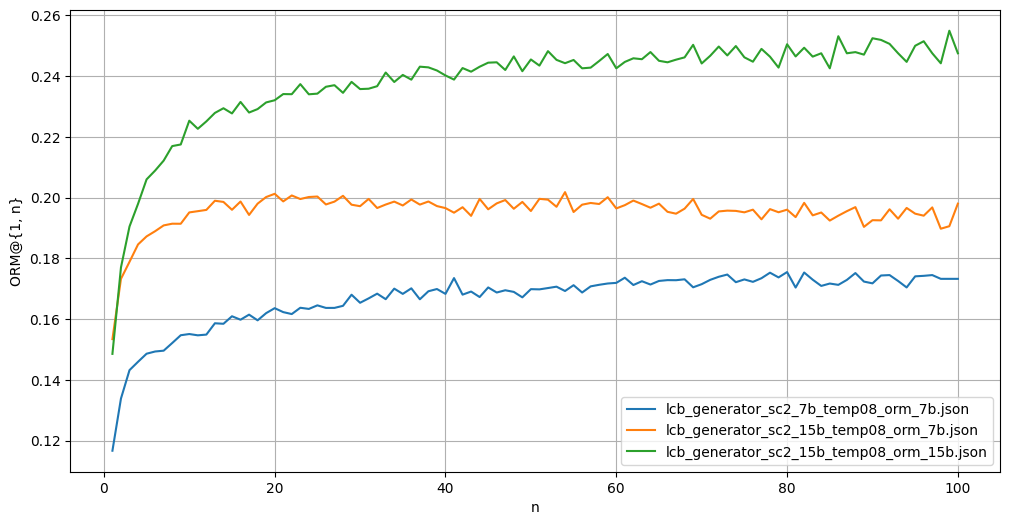

In [6]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))
for label, values in all_orm_accs.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--' if any(p in label for p in paths_to_results) and len(compare) > 0 else '-'
    plt.plot(ks, pass_at_k, label=Path(label).stem, linestyle=linestyle)

plt.xlabel('n')
plt.ylabel('ORM@{1, n}')
plt.legend()
plt.grid(True)
plt.show()